In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import os
import torch
import argparse
import sys
import uuid

seed = torch.initial_seed()

print('Seed', seed)

os.chdir('..')

from causal_rl.environments.causal_models import stacked_chain, classic_confounding
from causal_rl.sem import StructuralEquationModel, DirectedAcyclicGraph
from causal_rl.sem.utils import draw
from causal_rl.train import predict

Seed 109


In [6]:
parser = argparse.ArgumentParser(fromfile_prefix_chars='@')

parser.add_argument('--output_dir', type=str, default='/tmp/thesis')
parser.add_argument('--n_iters', type=int, default=50000)
parser.add_argument('--log_iters', type=int, default=50000)
parser.add_argument('--use_random', type=bool, default=True)
parser.add_argument('--entr_loss_coeff', type=float, default=0)
parser.add_argument('--intervention_value', type=int, default=1)
parser.add_argument('--lr', type=float, default=.001)
parser.add_argument('--reg_lambda', type=float, default=1)
parser.add_argument('--noise', type=float, default=0.)
parser.add_argument('--seed', type=int, default=None)


sys.argv = ['train.py']

config = parser.parse_args()

if not config.output_dir:
    _id = str(uuid.uuid1())
    output_dir = os.path.join('experiments', 'inbox', str(_id))
    os.makedirs(output_dir)
    config.output_dir = output_dir

[+0.000, +0.000, +0.000]
[+1.000, +0.000, +0.000]
[+1.000, +1.000, +0.000]
old model weights
[+1.000, +0.000, +0.000]
[+1.370, +0.000, +0.000]
[+0.000, +1.603, +0.000]

gradients
[+0.000, +0.000, +0.000]
[+1.000, +0.000, +0.000]
[+1.000, +1.000, +0.000]

new model weights
[+1.000, +0.000, +0.000]
[+1.370, +0.000, +0.000]
[+0.000, +1.603, +0.000]


50000 / 50000 		 loss: 1.1238626193351873
obs   [+0.000, +0.000, +1.000]
pred  [+0.000, +0.000, +1.000]
true  [+0.000, +0.000, +1.000]
noise [+0.000, +0.000, +1.000]

------------------------------
------------------------------
old model weights
[+1.000, +0.000, +0.000]
[+1.346, +0.000, +0.000]
[+0.005, +1.621, +0.000]

gradients
[+0.000, +0.000, +0.000]
[-0.308, +0.000, +0.000]
[+1.000, +1.000, +0.000]

new model weights
[+1.000, +0.000, +0.000]
[+1.346, +0.000, +0.000]
[+0.005, +1.621, +0.000]


50000 / 50000 		 loss: 1.2786345764951668
obs   [+1.000, +2.000, +3.000]
pred  [+1.000, +1.346, +1.000]
true  [+1.000, +2.000, +1.000]
noise [+1.0

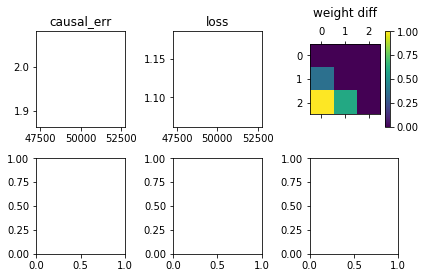

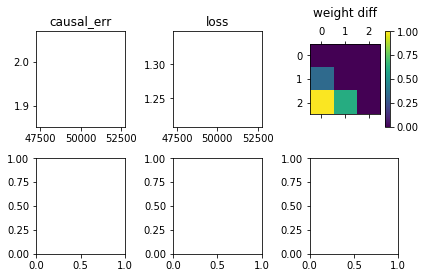

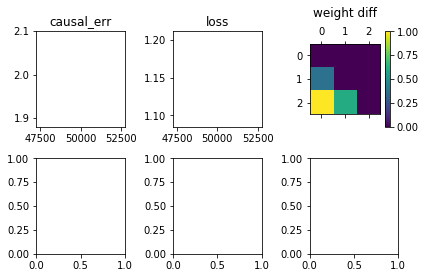

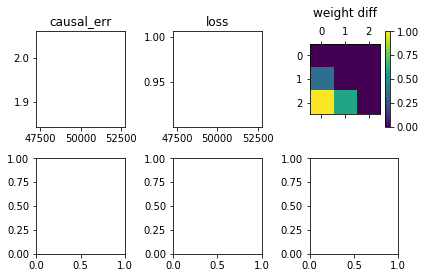

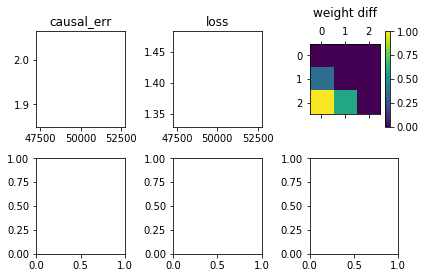

In [11]:
def pretty(vector):
    vlist = vector.view(-1).tolist()
    return "[" + ", ".join("{:+.3f}".format(vi) for vi in vlist) + "]"

def print_pretty(matrix):
    for row in matrix:
        print(pretty(row))

weights = torch.tensor([
    [[0,0,0],
    [0,0,0],
    [0,0,0]],
    [[0,0,0],
    [1,0,0],
    [1,1,0]]
])

model_weights = []

model = StructuralEquationModel(DirectedAcyclicGraph(weights))

print_pretty(model.graph.weights[1,:,:])

for i in range(105,110):
    config.seed = i
    torch.manual_seed(i)
    
    stats = predict(model, config)
    model_weights.append(stats['model_weights'])
    
    print('-'*30)
    print('-'*30)

In [10]:
for _weights in model_weights:
    print_pretty(_weights)
    print()

[+1.000, +0.000, +0.000]
[-0.000, +0.000, +0.000]
[-0.000, +0.024, +0.000]

[+1.000, +0.000, +0.000]
[-0.000, +0.000, +0.000]
[-0.001, +0.079, +0.000]

[+1.000, +0.000, +0.000]
[-0.002, +0.000, +0.000]
[-0.000, +0.002, +0.000]

[+1.000, +0.000, +0.000]
[+0.000, +0.000, +0.000]
[+0.006, +0.017, +0.000]

[+1.000, +0.000, +0.000]
[+0.001, +0.000, +0.000]
[+0.000, +0.023, +0.000]

